### irisデータセットで 花弁長(petal_length)と花弁幅(petal_width) でがく長(sepal_length)を予測する。

sepal_lengthを正解データ、petal_lengthとpetal_widthを特徴量として回帰分析します。

In [8]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

from sklearn.linear_model import LinearRegression
model = LinearRegression()
df2 = df[['petal_length','petal_width','sepal_length']]

train,test = train_test_split(df2,test_size=0.2,random_state=0)
x = train[['petal_length','petal_width']]
y = train['sepal_length']

model.fit(x,y)
print('train:',model.score(x,y))

x_test = test[['petal_length','petal_width']]
y_test = test['sepal_length']
print('test:',model.score(x_test,y_test))


train: 0.7732256580318062
test: 0.7081389996859655


決定係数は訓練データで0.733テストデータで0.708になっているので、この２つの特徴量はsepal_lengthを説明していると言えます。
散布図で見るとpetal_lengthとpetal_widthとsepal_lengthは正の相関関係があり、また、petal_lengthとpetal_widthにも正の相関関係があるのがわかります。

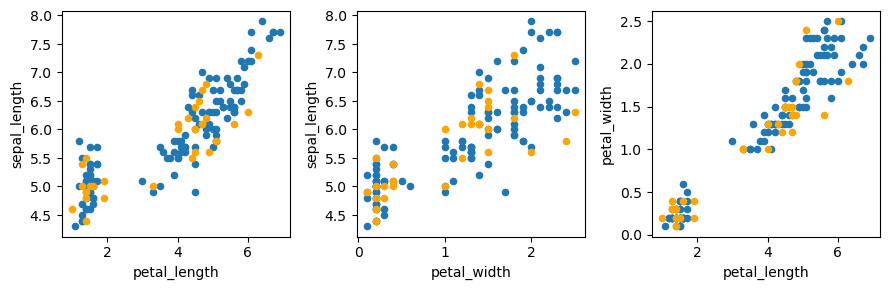

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(9,3))
train.plot(kind='scatter', x='petal_length', y='sepal_length', ax=axs[0])
train.plot(kind='scatter', x='petal_width', y='sepal_length', ax=axs[1])
train.plot(kind='scatter', x='petal_length', y='petal_width', ax=axs[2])
test.plot(kind='scatter', x='petal_length', y='sepal_length', color='orange',ax=axs[0])
test.plot(kind='scatter', x='petal_width', y='sepal_length', color='orange',ax=axs[1])
test.plot(kind='scatter', x='petal_length', y='petal_width', color='orange',ax=axs[2])
plt.tight_layout()
plt.show()

相関係数もそれぞれ、0.871, 0.817, 0.962 と強い相関関係があることを示しています。

In [10]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [11]:
model.coef_

array([ 0.5629529 , -0.34638005])

### 白色化

正の相関があるpetal_lengthとpetal_widthを白色化して散布図で表示すると無相関になっていることがわかります。

<Axes: xlabel='petal_length', ylabel='petal_width'>

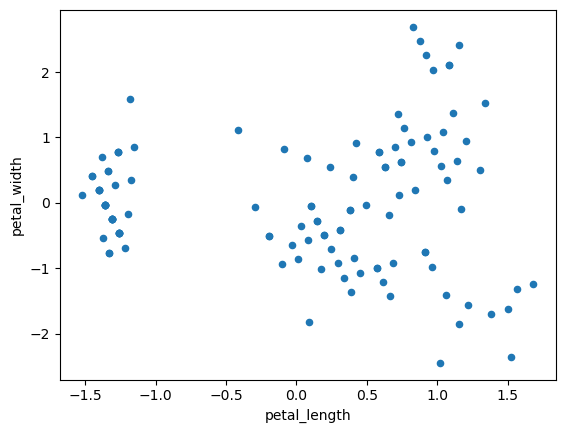

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model_pca = PCA(n_components=2, whiten=True) #False１にすると標準化されない、白色化はされる

model_pca.fit(x)
pca = model_pca.transform(x)

dfpca = pd.DataFrame(pca, columns=['petal_length','petal_width'])
# 白色化したデータを散布図で表示
dfpca.plot(kind='scatter', x='petal_length', y='petal_width')


相関係数は0になっています。

In [13]:
dfpca.corr()

,petal_length,petal_width
petal_length,1.000000e+00,9.920286e-16
petal_width,9.920286e-16,1.000000e+00


白色化しても特徴は分散として残っているので、回帰モデルの訓練データとして使えます。

In [14]:
# 白色化した訓練データで回帰分析
model = LinearRegression()
model.fit(pca,y)
print('train:',model.score(pca, y))
# 白色化したテストデータで回帰分析
x_test_pca = model_pca.transform(x_test)
print('test:', model.score(x_test_pca, y_test))

train: 0.7732256580318061
test: 0.7081389996859653


In [15]:
dfpca.describe()

,petal_length,petal_width
count,1.200000e+02,1.200000e+02
mean,3.774758e-16,-7.697546e-16
std,1.000000e+00,1.000000e+00
min,-1.518261e+00,-2.444654e+00
25%,-1.260603e+00,-6.536452e-01
50%,2.674963e-01,-5.103140e-02
75%,8.290669e-01,6.357463e-01
max,1.680425e+00,2.692713e+00
